# **Breast Cancer IDC Classification using Deep Learning**

This notebook describes the exploratory data analysis for classification of breast histopathology images.


Author : Rania Charkaoui 

## Exploratory Data Analysis

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.0-rc0


In [13]:
import os
from glob import glob
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import itertools
from skimage.io import imread
from tensorflow.keras.preprocessing import image
from PIL import Image
from keras.preprocessing.image import load_img, img_to_array

### Data Preparation

In [4]:
print(os.getcwd())
# os.chdir("data")
print(os.listdir("data/"))

/Users/raniacharkaoui/Desktop/MA1/idc_in_breast_cancer
['9036', '10268', '10257', '8913', '13613', '8914', '15510', '10259', '16165', '10292', '12951', '10261', '10295', '9259', '12750', '13020', '16552', '12905', '9266', '16555', '13018', '9261', '9257', '12934', '12933', '9250', '10260', '10258', '10293', '9037', '10269', '16531', '10256', '15516', '12932', '12935', '9256', '16554', '9260', '13019', '16553', '13021', '8984', '9258', '12751', '9267', '12876', '12882', '15634', '12871', '14188', '15633', '9324', '12878', '.DS_Store', '9323', '9383', '8867', '9346', '9174', '12822', '9173', '9322', '9325', '12879', '14189', '12870', '12884', '12241', '15632', '12883', '12877', '9126', '13106', '12823', '13591', '9175', '12824', '9347', '9181', '9382', '10307', '13916', '10300', '14306', '15471', '16896', '14156', '9135', '12890', '12897', '10308', '10301', '10306', '12896', '14157', '12891', '12898', '14192', '13458', '9083', '9077', '13460', '8955', '12910', '9041', '14210', 'IDC_regul

In [5]:
data = []

for n in os.listdir("data/"):
    if n != "DeepLearning_BreastCancer.ipynb" and n != ".DS_Store" and n != ".ipynb_checkpoints" and n !='IDC_regular_ps50_idx5':
        for d in os.listdir("data/" + n): #0 or 1
            if d != ".DS_Store":
                for f in os.listdir("data/" + n + "/" +str(d)+"/"): #png file
                    data.append("data/{}/{}/{}".format(n,d,f))

print(len(data))
print(data[:10])

277524
['data/9036/0/9036_idx5_x1051_y2401_class0.png', 'data/9036/0/9036_idx5_x2951_y951_class0.png', 'data/9036/0/9036_idx5_x3001_y1451_class0.png', 'data/9036/0/9036_idx5_x3051_y801_class0.png', 'data/9036/0/9036_idx5_x951_y1901_class0.png', 'data/9036/0/9036_idx5_x2251_y751_class0.png', 'data/9036/0/9036_idx5_x1901_y401_class0.png', 'data/9036/0/9036_idx5_x3201_y1101_class0.png', 'data/9036/0/9036_idx5_x3351_y1251_class0.png', 'data/9036/0/9036_idx5_x2051_y2551_class0.png']


In [6]:
f = pd.Series(data)
# print(f[:10])
i = f.apply(lambda x: x.split("_")[0].split("/")[3]).astype('int')
# print(i[:10])
x = f.apply(lambda x: x.split("_")[2][1:]).astype('int')
# print(x[:10])
y = f.apply(lambda x: x.split("_")[3][1:]).astype('int')
# print(y[:10])
c = f.apply(lambda x: x.split("_")[4][5]).astype('str')
# print(c[:10])
# print(len(f))
df = pd.DataFrame({'filename': f, 'id': i, 'x':x, 'y':y,'class':c})
print(df.head())

                                       filename    id     x     y class
0  data/9036/0/9036_idx5_x1051_y2401_class0.png  9036  1051  2401     0
1   data/9036/0/9036_idx5_x2951_y951_class0.png  9036  2951   951     0
2  data/9036/0/9036_idx5_x3001_y1451_class0.png  9036  3001  1451     0
3   data/9036/0/9036_idx5_x3051_y801_class0.png  9036  3051   801     0
4   data/9036/0/9036_idx5_x951_y1901_class0.png  9036   951  1901     0


In [7]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277524 entries, 0 to 277523
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   filename  277524 non-null  object
 1   id        277524 non-null  int64 
 2   x         277524 non-null  int64 
 3   y         277524 non-null  int64 
 4   class     277524 non-null  object
dtypes: int64(3), object(2)
memory usage: 10.6+ MB
None
                  id              x              y
count  277524.000000  277524.000000  277524.000000
mean    11811.994757    1620.891433    1207.814005
std      2354.814020     813.975056     628.163551
min      8863.000000       1.000000       1.000000
25%      9322.000000    1001.000000     701.000000
50%     12750.000000    1601.000000    1151.000000
75%     13458.000000    2201.000000    1651.000000
max     16896.000000    4001.000000    2951.000000


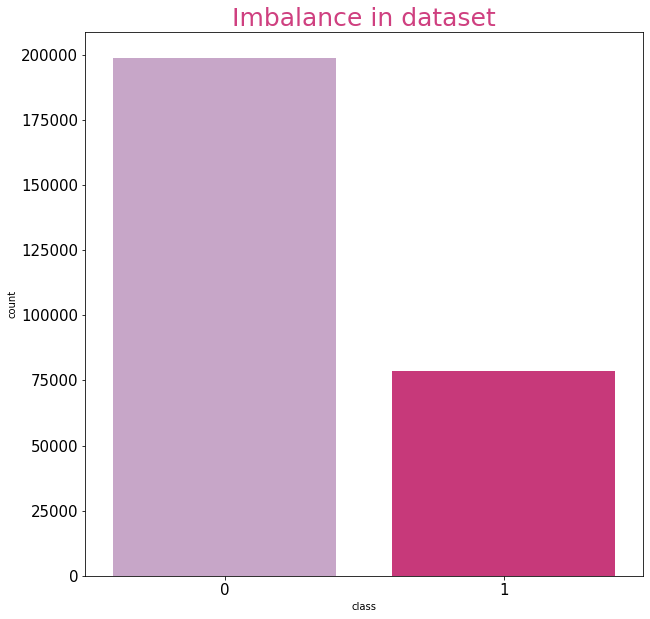

In [8]:
labels = ["0","1"]
fig = plt.figure(figsize=(10,10))
title = plt.title("Imbalance in dataset")
plt.setp(title,color=(0.81,0.25,0.50,1),fontsize=25)
sns.countplot(data=df,x='class',palette = "PuRd")
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

#plt.savefig('results/countplot_imbalance.png',dpi=fig.dpi, transparent=True)
plt.show()


In [9]:
# Removing imbalance in data by downsampling
df_cut = df.copy()

imbalance = sum(df["class"]=='0') - sum(df["class"]=='1')

to_cut = df_cut.loc[df_cut["class"]=='0'].sample(n=imbalance)

df_cut = df_cut.loc[~df_cut["filename"].isin(to_cut["filename"])]
print(df_cut.head())
print(len(df_cut))

                                        filename    id     x     y class
0   data/9036/0/9036_idx5_x1051_y2401_class0.png  9036  1051  2401     0
1    data/9036/0/9036_idx5_x2951_y951_class0.png  9036  2951   951     0
2   data/9036/0/9036_idx5_x3001_y1451_class0.png  9036  3001  1451     0
13   data/9036/0/9036_idx5_x2001_y701_class0.png  9036  2001   701     0
14  data/9036/0/9036_idx5_x3001_y1351_class0.png  9036  3001  1351     0
157572


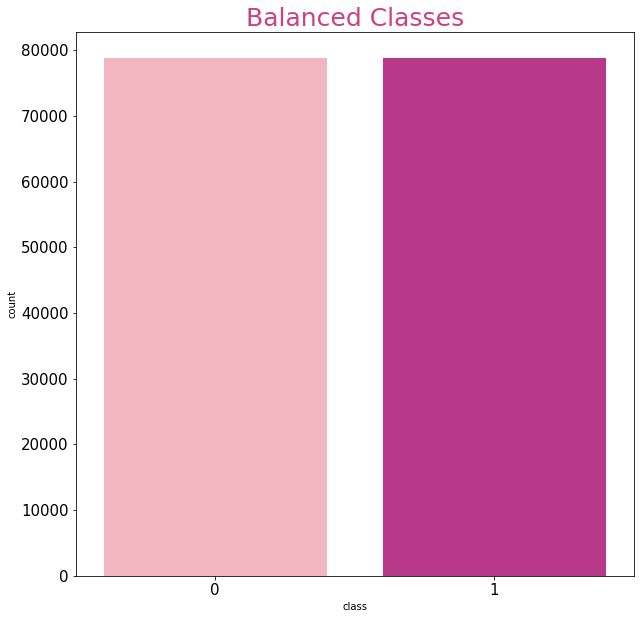

In [10]:
labels = ["0","1"]
fig = plt.figure(figsize=(10,10))
title = plt.title("Balanced Classes")
plt.setp(title,color=(0.81,0.25,0.50,1),fontsize=25)
sns.countplot(data=df_cut,x='class',palette = "RdPu")
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

#plt.savefig('results/countplot_afterbalance_2.png',dpi=fig.dpi, transparent=True)
plt.show()

In [14]:
def show_img(files):
    plt.figure(figsize= (10,10))
    ind = np.random.randint(0, len(files), 25)
    i=0
    for loc in ind:
        plt.subplot(5,5,i+1)
        sample = load_img(files[loc], target_size=(150,150))
        sample = img_to_array(sample)
        plt.axis("off")
        plt.imshow(sample.astype("uint8"))
        #plt.savefig('results/someimages_3.png',transparent=True)
        i+=1

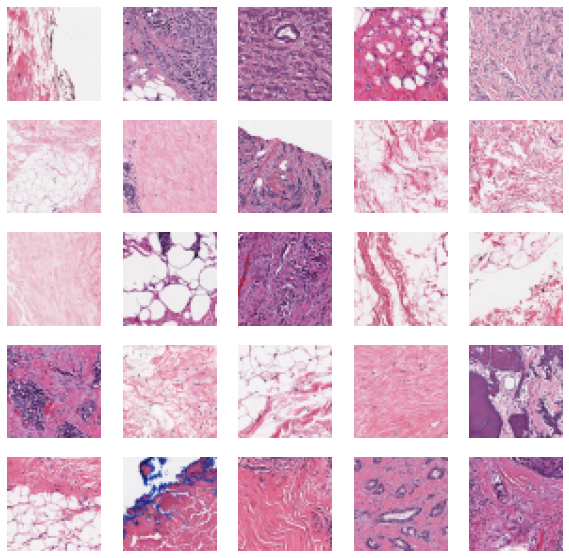

In [15]:
show_img(data)

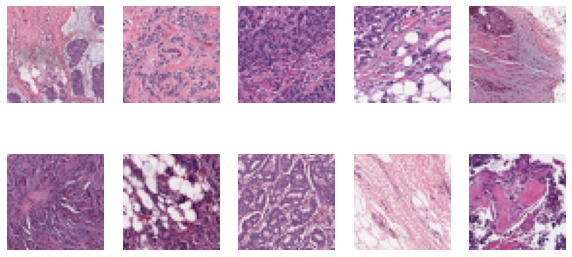

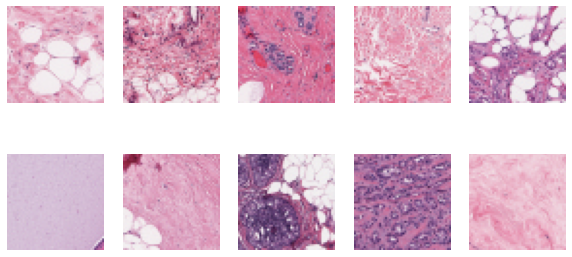

In [18]:
sample = df.loc[df["class"]=='0'].sample(n=10)
sample = sample.append(df.loc[df["class"]=='1'].sample(n=10)).reset_index(drop=True)
#print(sample)
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(top = 0.5)

#plotting positive patches
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.axis("off")
    plt.imshow(imread(sample.loc[10+i, "filename"]))


#plt.savefig('results/positive_3.png', transparent=True)

plt.show()

fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(top = 0.5)

#plotting negative patches 
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.axis("off")
    plt.imshow(imread(sample.loc[i, "filename"]))


#plt.savefig('results/negative_3.png', transparent=True)

plt.show()

In [19]:
def plotHistogram(im, label):
    """
    Plot histogram of RGB Pixel Intensities
    """
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(im)
    plt.axis('off')
    title = plt.title('IDC positive' if label==1 else 'IDC negative')
    plt.setp(title,color=(1,1,1,1))
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count',color='w')
    histo.set_xlabel('Pixel Intensity',color='w')
    n_bins = 30
    plt.hist(im[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5)
    plt.hist(im[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5)
    plt.hist(im[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5)
    #plt.savefig('results/hist_5.png', transparent=True)
    plt.show()

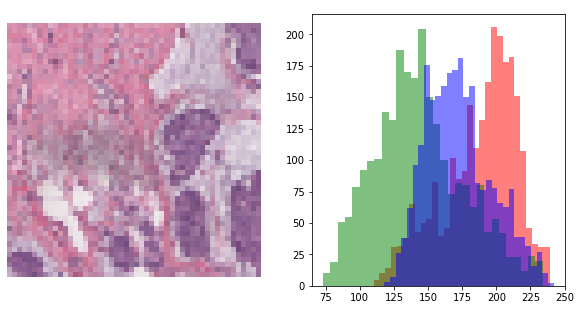

In [20]:
plotHistogram(imread(sample.loc[10,'filename']),sample.loc[10,'class'])

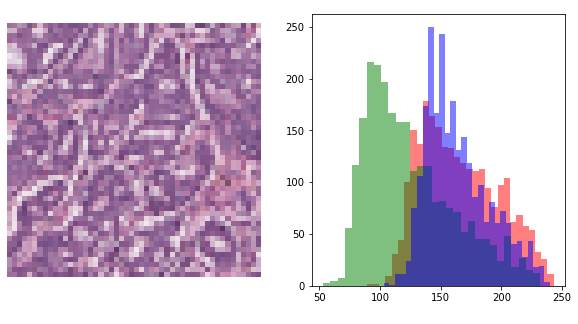

In [21]:
plotHistogram(imread(sample.loc[17,'filename']),sample.loc[17,'class'])

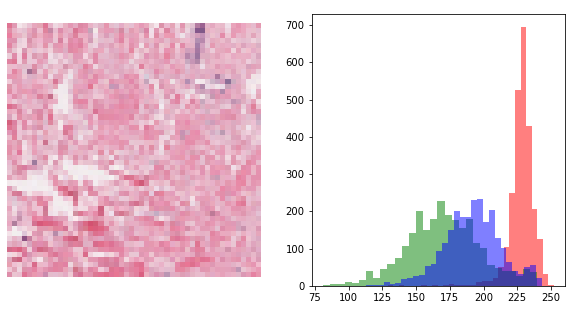

In [22]:
plotHistogram(imread(sample.loc[3,'filename']),sample.loc[3,'class'])

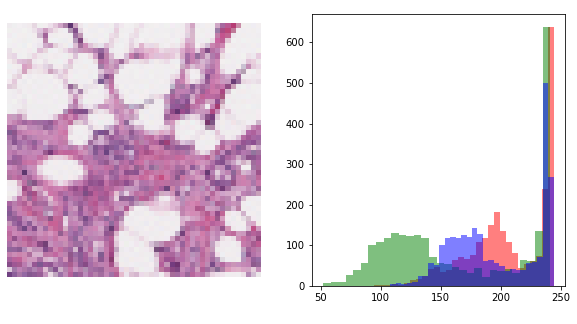

In [23]:
plotHistogram(imread(sample.loc[4,'filename']),sample.loc[4,'class'])

In [24]:
PATH = 'data/'
folders = os.listdir('data/')
folders.sort()

Few negative image of Patient ID 15514


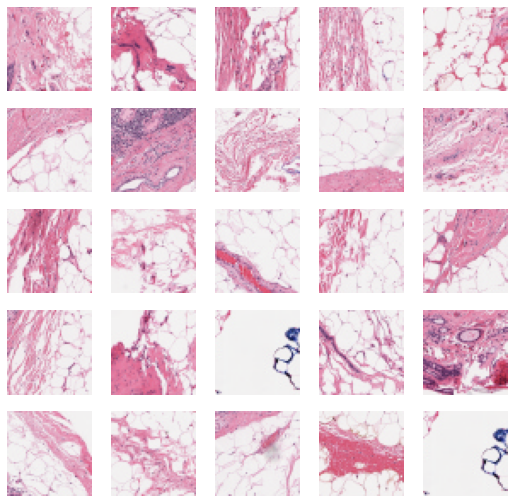

Few positive image of Patient ID 15514


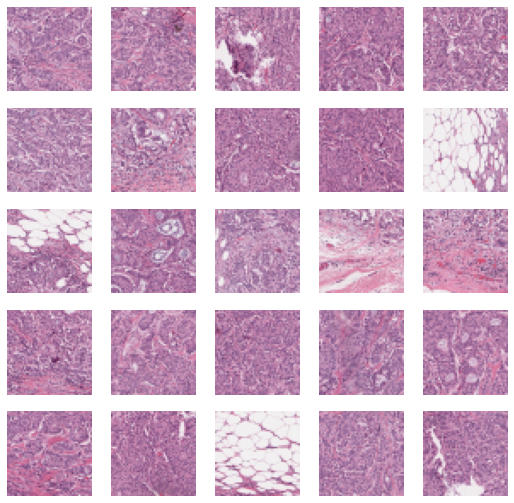

In [25]:
def get_x_y(string):
    _, _, x, y, c = string.split('_')
    return [int(x[1:]), int(y[1:]), int(c[-5])]

def getImg(Pid):
    base = os.path.join("data/", Pid)
    stringList = []
    stringList.extend(base + '/0/' + s for s in os.listdir(base + '/0'))
    stringList.extend(base + '/1/' + s for s in os.listdir(base + '/1'))
    length = len(stringList)
    
    index = np.zeros((length, 3), dtype = np.int32)   
    smallImg = 255*np.ones((length, 50, 50, 3), dtype = np.int8)
    
    for i in range(length):
        index[i] = get_x_y(stringList[i])
        tempImg = Image.open(stringList[i])
        
        if tempImg.size != (50,50):
            smallImg[i, :tempImg.size[1], :tempImg.size[0]] = np.array(tempImg)
        else : 
            smallImg[i] = np.array(tempImg)
            
    maxVal = np.max(index, axis = 0)
    fullImg = 255 * np.ones((maxVal[1] + 50, maxVal[0] + 50, 4), dtype = np.int8)
    for i in range(length):
        x, y, c = index[i]
        fullImg[y : y+50, x : x+50, :3] = smallImg[i]
        if c == 0:
            fullImg[y : y+50, x : x+50, 3] = 150
    return fullImg

def viewImg():
    idx = np.random.randint(0,high = len(folders))
    basePath = os.path.join(PATH, folders[idx])
    imgs0 = os.listdir(os.path.join(basePath, '0'))
    imgs1 = os.listdir(os.path.join(basePath, '1'))
    base0 = os.path.join(basePath,'0')
    base1 = os.path.join(basePath,'1')
    idx0 = np.random.choice(np.arange(len(imgs0)), size = 25)
    idx1 = np.random.choice(np.arange(len(imgs1)), size = 25)
    
    print('Few negative image of Patient ID ' + str(folders[idx]))
    plt.figure(figsize = [9,9])
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        plt.imshow(Image.open(os.path.join(base0, imgs0[idx0[i]])))
        #plt.savefig('results/few_negative.png', transparent=True)
    plt.show()
    
    print('Few positive image of Patient ID ' + str(folders[idx]))
    plt.figure(figsize = [9,9])
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        plt.imshow(Image.open(os.path.join(base1, imgs1[idx1[i]])))
        #plt.savefig('results/few_positive.png', transparent=True)
    plt.show()
viewImg()

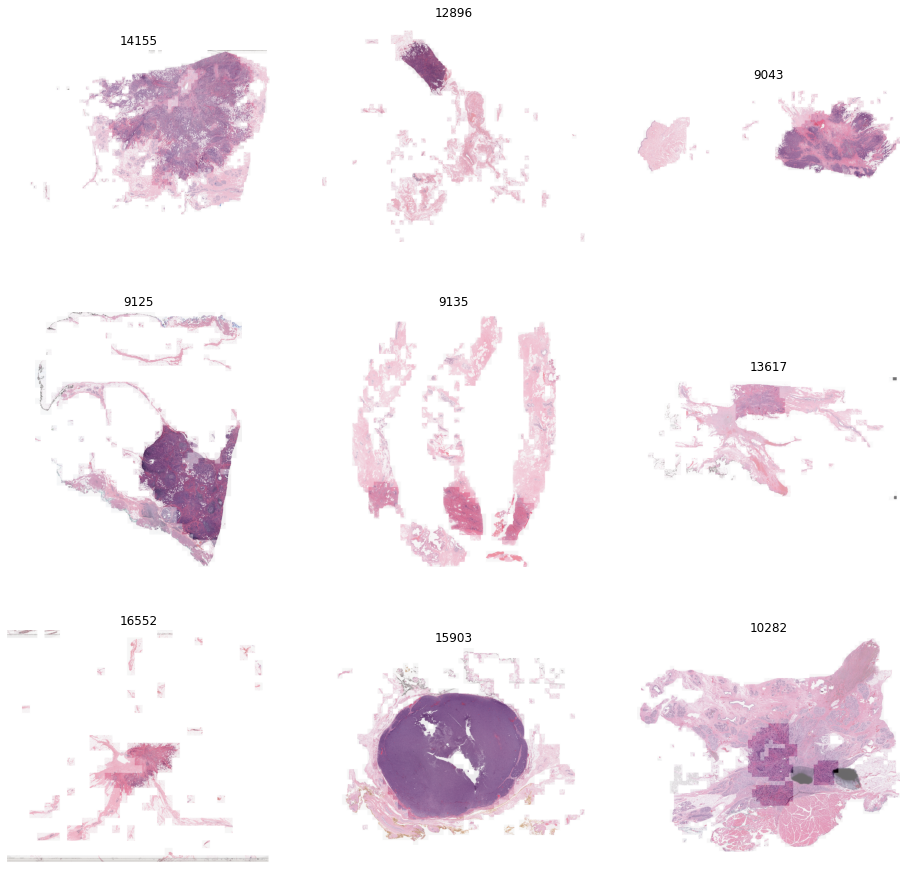

In [26]:
def viewRandom9():
    """plots random whole mount slides"""
    idx = np.random.choice(np.arange(len(folders)) ,size = 9)
    plt.figure(figsize = [16,16])
    for i in range(9):        
        plt.subplot(3,3, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        plt.title(str(folders[idx[i]]))
        plt.imshow(getImg(folders[idx[i]]))
        #plt.savefig('results/whole_mount_slide.png', transparent=True)

viewRandom9()